<h1><strong><u>Naive Bayes Model Test</u></strong></h1>

In [1]:
%%capture
%run DataPrep.ipynb

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

In [18]:
nb_model = Pipeline(
    [
        ("clf", GaussianNB())
    ]
)
nb_model.fit(X=X_train, y=y_train)

Pipeline(steps=[('samp', StandardScaler()), ('clf', GaussianNB())])

Exception ignored in: <function ResourceTracker.__del__ at 0x103379bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [ ]:
param_grid = {"clf__C": [0.1, 0.3, 0.5, 0.7, 0.9, 1]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
nb_model = grid_search.best_estimator_
print(nb_model)

def nb_cv():
    return nb_model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END .........................................clf__C=0.3; total time=   0.0s
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END .........................................clf__C=0.3; total time=   0.0s
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END .........................................clf__C=0.3; total time=   0.0s
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END .........................................clf__C=0.3; total time=   0.0s
[CV] END .........................................clf__C=0.5; total time=   0.0s
[CV] END .........................................clf__C=0.3; total time=   0.0s
[CV] END ........................................

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
Gaussian takess no parameters.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curve Tests</u></strong></h3>

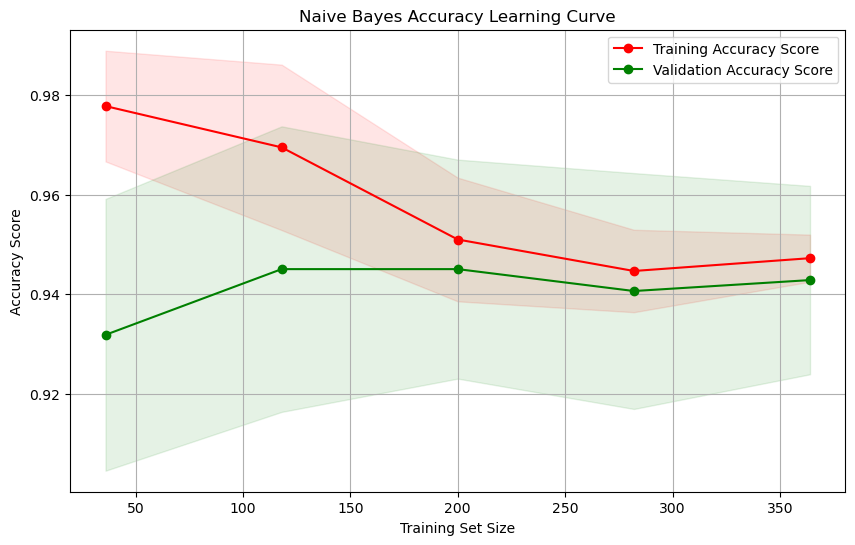

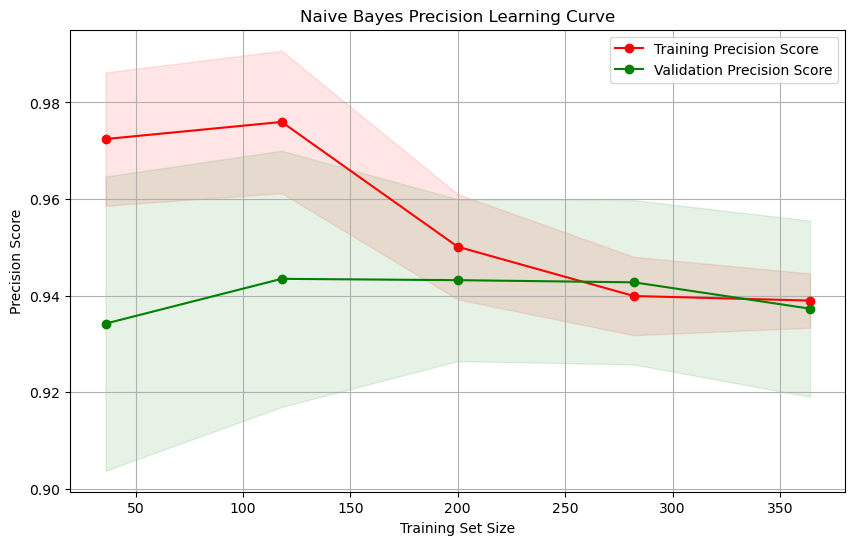

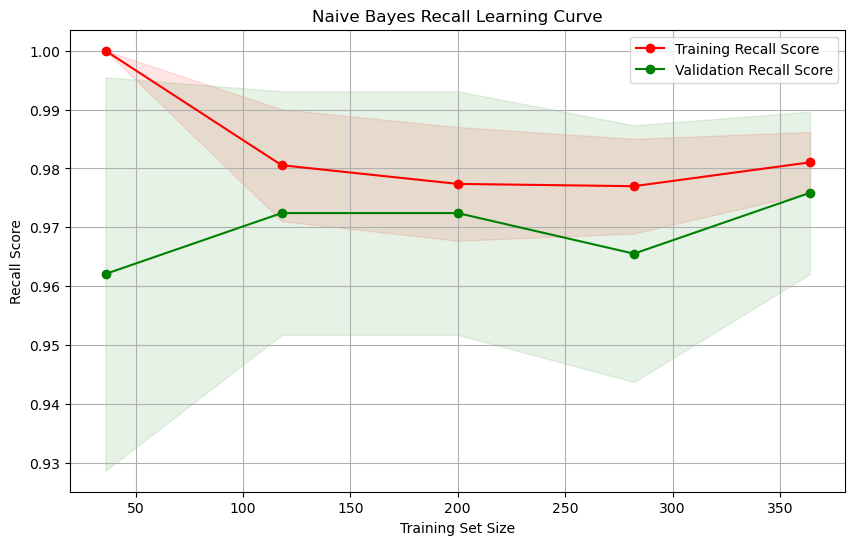

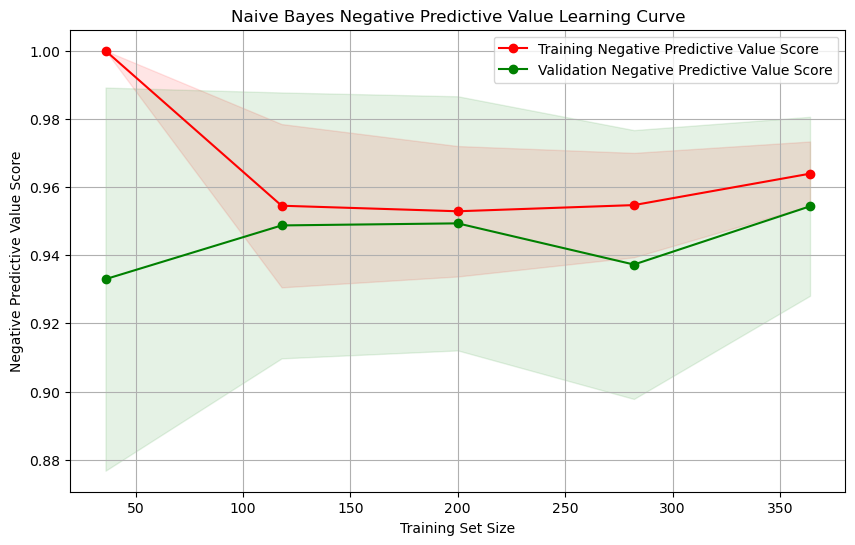

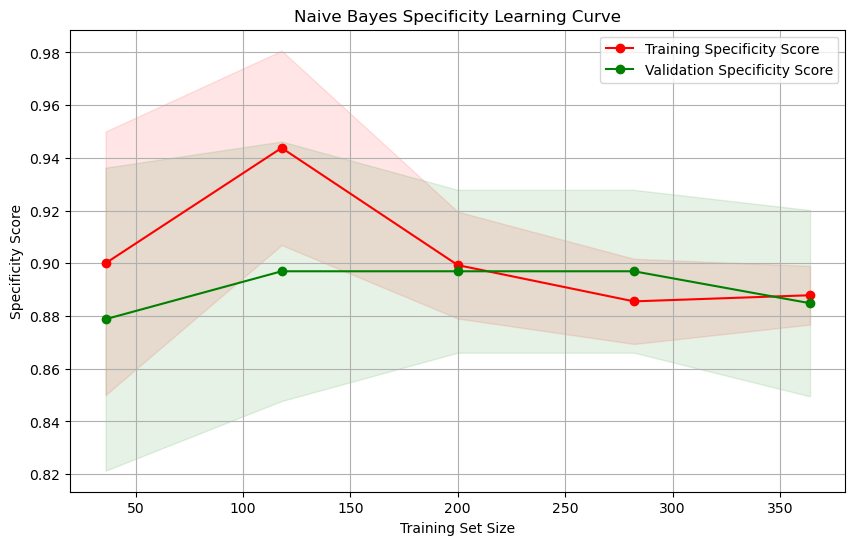

In [5]:
for key, value in clf_metrics.items():
    nb_train_sizes, nb_train_scores, nb_validation_scores = learning_curve(
        nb_model,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    nb_train_scores_mean = np.mean(nb_train_scores, axis=1)
    nb_train_scores_std = np.std(nb_train_scores, axis=1)
    nb_validation_scores_mean = np.mean(nb_validation_scores, axis=1)
    nb_validation_scores_std = np.std(nb_validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(f"Naive Bayes {key} Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(f"{key} Score")
    plt.grid()

    plt.fill_between(nb_train_sizes, nb_train_scores_mean - nb_train_scores_std,
                    nb_train_scores_mean + nb_train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(nb_train_sizes, nb_validation_scores_mean - nb_validation_scores_std,
                    nb_validation_scores_mean + nb_validation_scores_std, alpha=0.1,
                    color="g")
    plt.plot(nb_train_sizes, nb_train_scores_mean, 'o-', color="r",
                label=f"Training {key} Score")
    plt.plot(nb_train_sizes, nb_validation_scores_mean, 'o-', color="g",
                label=f"Validation {key} Score")

    plt.legend(loc="best")
    plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [9]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(nb_model, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.93406593 0.96703297 0.91208791 0.94505495 0.95604396]
Training Average and Standard Error:  0.94% ± 1.89% 

Precision
CV Training Scores:  [0.93333333 0.95081967 0.90322581 0.94915254 0.95      ]
Training Average and Standard Error:  0.94% ± 1.82% 

Recall
CV Training Scores:  [0.96551724 1.         0.96551724 0.96551724 0.98275862]
Training Average and Standard Error:  0.98% ± 1.38% 

Negative Predictive Value
CV Training Scores:  [0.93548387 1.         0.93103448 0.9375     0.96774194]
Training Average and Standard Error:  0.95% ± 2.63% 

Specificity
CV Training Scores:  [0.87878788 0.90909091 0.81818182 0.90909091 0.90909091]
Training Average and Standard Error:  0.88% ± 3.53% 



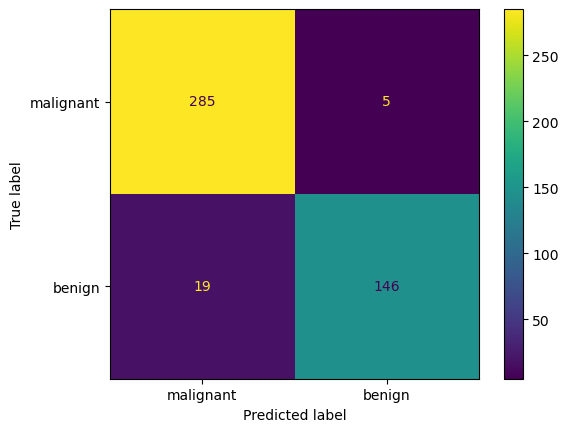

In [10]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb_model, X_train, y_train, labels=['malignant', 'benign'])

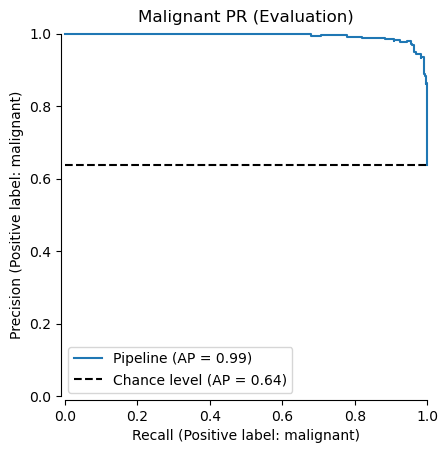

In [11]:
disp = PrecisionRecallDisplay.from_estimator(nb_model, X_train, y_train, pos_label="malignant", plot_chance_level=True, despine=True)
disp.ax_.set_title("Malignant PR (Evaluation)")
plt.show()

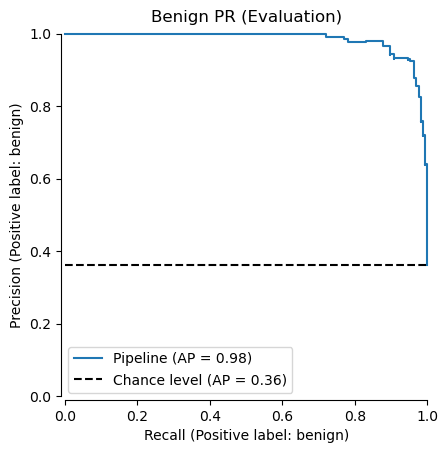

In [12]:
disp = PrecisionRecallDisplay.from_estimator(nb_model, X_train, y_train, pos_label="benign", plot_chance_level=True, despine=True)
disp.ax_.set_title("Benign PR (Evaluation)")
plt.show()

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
I don't like the results from the Gaussian model. Maybe scaling will help.

<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [13]:
# for key, value in clf_metrics.items():
#     print(f"{key}")
#     log_test_values = cross_val_score(nb_model, X_test, y_test, scoring=value, cv=5)
#     print(f"CV test Scores: ", log_test_values)
#     np_log_test_values = np.array(log_test_values)
#     average = np.mean(np_log_test_values)
#     stDev = np.std(np_log_test_values)
#     print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

In [14]:
# #Testing Confusion Matrix
# test_predictions = nb_model.predict(X_test)
# ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['malignant', 'benign'])

In [15]:
# disp = PrecisionRecallDisplay.from_estimator(nb_model, X_test, y_test, pos_label="malignant", plot_chance_level=True, despine=True)
# disp.ax_.set_title("Malignant PR Display (Test)")
# plt.show()

In [16]:
# disp = PrecisionRecallDisplay.from_estimator(nb_model, X_test, y_test, pos_label="benign", plot_chance_level=True, despine=True)
# disp.ax_.set_title("Benign PR Display (Test)")
# plt.show()

Exception ignored in: <function ResourceTracker.__del__ at 0x1070b5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103291bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102d21bc0>
Traceback (most recent call last

<h4><strong><u>Findings From 'Model Testing' Phase</u></strong></h4>
In the testing phase of my selected model, I found that the testing results werein keeping with my results from the 'Model Evaluation' section. 

<h2><strong><u>Conclusion</u></strong></h2>
I will note that I would like to get my evaluation and test scores as close to 100% as possible. Considering the magnitude of the purpose of this model, we need to minimize False Positives and False Negative as much as possible because patients lives are at risks depending on these results. I will be looking into other models to compare them so that I can reach this goal.